## Feature Scaling in Python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

In [4]:
# Load Iris data (https://en.wikipedia.org/wiki/Iris_flower_data_set)
iris = load_iris()

# Load iris into a dataframe and set the field names
df = pd.concat([pd.DataFrame(iris['data'], columns=iris['feature_names']),
                pd.Series(iris['target'], name = 'class')], axis = 1)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

### Distribution of Features without Scaling

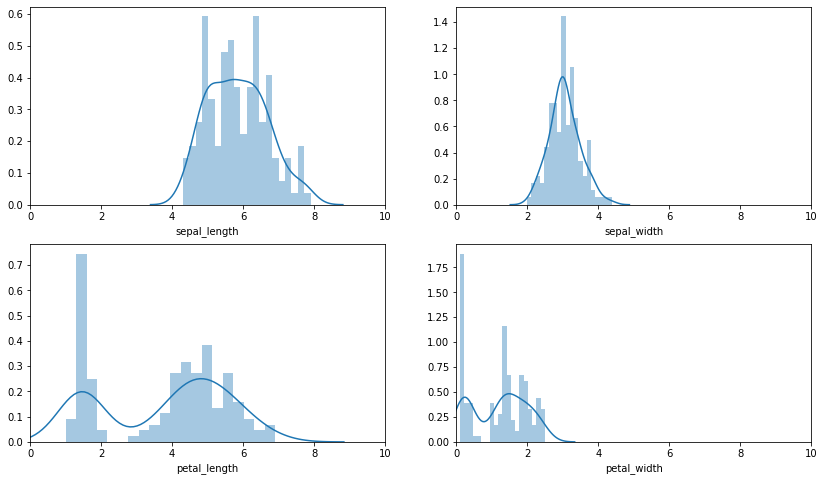

In [5]:
plt.figure(figsize=(14,8))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    sns.distplot(df.iloc[:,i-1], bins=20)
    plt.xlim(0,10)

In [6]:
x = pd.DataFrame(pd.concat([df.iloc[:,0:4].mean(),df.iloc[:,0:4].std()], axis=1))
x.columns = ['mean','std']
round(x,2)

,mean,std
sepal_length,5.84,0.83
sepal_width,3.06,0.44
petal_length,3.76,1.77
petal_width,1.20,0.76


### Min-Max Scaler

In [7]:
scaler = MinMaxScaler()
scaler.fit(df.iloc[:,0:4])
tmp_scaled = pd.DataFrame(scaler.transform(df.iloc[:,0:4]), 
                          columns = ['sepal_length_scaled', 'sepal_width_scaled', 'petal_length_scaled', 'petal_width_scaled'])

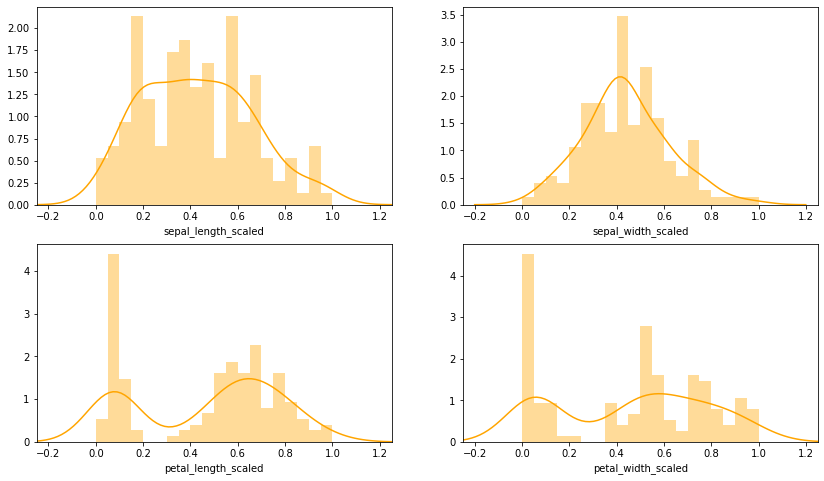

In [8]:
plt.figure(figsize=(14,8))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    sns.distplot(tmp_scaled.iloc[:,i-1], color='orange', bins=20)
    plt.xlim(-0.25,1.25)

In [9]:
x = pd.DataFrame(pd.concat([tmp_scaled.iloc[:,0:4].mean(),tmp_scaled.iloc[:,0:4].std()], axis=1))
x.columns = ['mean','std']
round(x,2)

,mean,std
sepal_length_scaled,0.43,0.23
sepal_width_scaled,0.44,0.18
petal_length_scaled,0.47,0.30
petal_width_scaled,0.46,0.32


### Standard Scaler

In [10]:
std_scaler = StandardScaler()
std_scaler.fit(df.iloc[:,0:4])
tmp_std_scaled = pd.DataFrame(std_scaler.transform(df.iloc[:,0:4]), 
                          columns = ['sepal_length_std_scaled', 'sepal_width_std_scaled', 'petal_length_std_scaled', 'petal_width_std_scaled'])

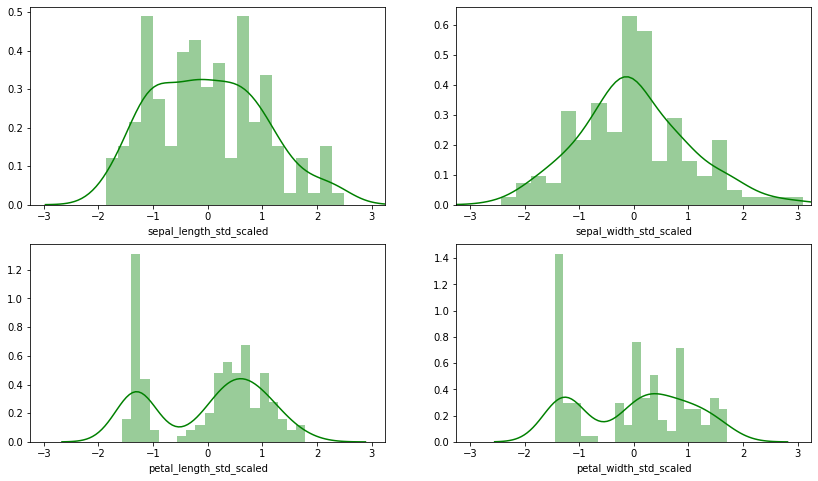

In [11]:
plt.figure(figsize=(14,8))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    sns.distplot(tmp_std_scaled.iloc[:,i-1], color='green', bins=20)
    plt.xlim(-3.25,3.25)

In [12]:
x = pd.DataFrame(pd.concat([tmp_std_scaled.iloc[:,0:4].mean(),tmp_std_scaled.iloc[:,0:4].std()], axis=1))
x.columns = ['mean','std']
round(x,2)

,mean,std
sepal_length_std_scaled,-0.0,1.0
sepal_width_std_scaled,-0.0,1.0
petal_length_std_scaled,-0.0,1.0
petal_width_std_scaled,-0.0,1.0
